In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
# read the dataset into df
df = pd.read_csv('fifa.csv')

In [3]:
# clean the data by deleting the columns not required for the project
del df["player_url"]
del df["sofifa_id"]
del df["dob"]
del df["height_cm"]
del df["weight_kg"]
del df["international_reputation"]
del df["body_type"]
del df["real_face"]
del df["team_jersey_number"]
del df["loaned_from"]
del df["joined"]
del df["contract_valid_until"]
del df["nation_jersey_number"]
del df["defending_marking"]
del df["ls"]
del df["rs"]
del df["lw"]
del df["lf"]
del df["st"]
del df["cf"]
del df["rf"]
del df["rw"]
del df["lam"]
del df["cam"]
del df["ram"]
del df["lm"]
del df["lcm"]
del df["cm"]
del df["rcm"]
del df["rm"]
del df["lwb"]
del df["ldm"]
del df["cdm"]
del df["rdm"]
del df["rwb"]
del df["lb"]
del df["lcb"]
del df["cb"]
del df["rcb"]
del df["long_name"]
del df["league_rank"]
del df["preferred_foot"]
del df["weak_foot"]
del df["skill_moves"]
del df["player_tags"]
del df["player_traits"]
del df["rb"]
del df["team_position"]
del df["nation_position"]
del df["league_name"]
del df["goalkeeping_handling"]
del df["goalkeeping_reflexes"]
del df["goalkeeping_positioning"]
del df["goalkeeping_diving"]
del df["goalkeeping_kicking"]

# print first five records of the dataset
df.head()

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
1,Cristiano Ronaldo,35,Portugal,Juventus,92,92,46000000,220000,"ST, LW",High/Low,...,78,93,63,29,95,82,84,95,32,24
2,J. Oblak,27,Slovenia,Atlético Madrid,91,93,75000000,125000,GK,Medium/Medium,...,78,12,34,19,11,65,11,68,12,18
3,R. Lewandowski,31,Poland,FC Bayern München,91,91,80000000,240000,ST,High/Medium,...,86,85,81,49,94,79,88,88,42,19
4,Neymar Jr,28,Brazil,Paris Saint-Germain,91,91,90000000,270000,"LW, CAM",High/Medium,...,50,84,51,36,87,90,92,93,30,29


In [4]:
# 2.2 full backs

# find the best fullbacks in the game

# get all the fullbacks from the dataset

df_fb = df.loc[df['player_positions'].str.contains("LB", case = True)]
df_fb = df_fb.reset_index(drop = True)

df_fb_2 = df.loc[df['player_positions'].str.contains("RB", case = True)]
df_fb = pd.concat([df_fb, df_fb_2])
df_fb.sort_values(by=['potential'], inplace=True, ascending=False)

df_fb = df_fb.reset_index(drop = True)
df_fb

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,T. Alexander-Arnold,21,England,Liverpool,87,92,60000000,110000,RB,High/Medium,...,62,74,74,82,76,84,55,81,83,79
1,J. Kimmich,25,Germany,FC Bayern München,88,90,65000000,145000,"CDM, RB",High/Medium,...,67,84,89,82,80,84,44,85,84,79
2,A. Robertson,26,Scotland,Liverpool,87,89,53000000,155000,LB,High/High,...,65,65,85,82,77,79,55,83,84,81
3,Reguilón,23,Spain,Tottenham Hotspur,82,89,27500000,85000,"LB, LM",High/Medium,...,65,56,73,79,74,68,42,72,79,78
4,A. Davies,19,Canada,FC Bayern München,81,89,22500000,40000,"LB, LM, RM",High/Medium,...,74,63,77,76,75,68,60,74,77,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,Zhang Gong,28,China PR,Guangzhou R&F FC,54,54,70000,2000,"CM, CDM, LB",Medium/Medium,...,71,61,59,54,52,52,40,49,55,53
4077,Sun Kai,29,China PR,Shanghai Greenland Shenhua FC,54,54,60000,2000,LB,Low/Low,...,63,20,59,48,32,34,35,45,46,47
4078,G. Harkin,32,Republic of Ireland,Finn Harps,53,53,45000,500,"CM, LB, LM",Low/Medium,...,63,33,61,52,38,54,35,54,54,56
4079,Zhang Junzhe,29,China PR,Hebei China Fortune FC,52,52,40000,2000,"RB, RWB",Medium/Medium,...,54,21,50,50,50,35,34,37,54,56


In [5]:
for i in range(0, len(df_fb['overall'])):
    if df_fb['overall'][i] > 85:
        df_fb = df_fb.drop(i)

df_fb = df_fb.reset_index(drop=True)

# remove irrelevant columns
df_fb = df_fb.drop(['nationality', 'power_long_shots', 'power_strength', 'attacking_finishing', 'attacking_volleys', 'power_jumping', 'mentality_penalties', 'club_name', 'age', 'value_eur', 'wage_eur', 'player_positions', 'skill_fk_accuracy', 'release_clause_eur', 'work_rate', 'gk_reflexes', 'gk_positioning', 'gk_handling', 'gk_diving', 'gk_kicking', 'gk_speed'], axis = 1)

# for safekeeping keep the values in fb dataset
fb = df_fb

# get the top 10 rated full-backs according to their potential
df_fb = df_fb[0:10]
df_fb

,short_name,overall,potential,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,movement_balance,power_shot_power,power_stamina,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,Reguilón,82,89,85.0,55.0,73.0,78.0,78.0,70.0,79,...,72,62,80,73,79,74,68,72,79,78
1,A. Davies,81,89,96.0,67.0,69.0,83.0,76.0,76.0,73,...,82,71,79,77,76,75,68,74,77,79
2,Cucurella,81,89,81.0,67.0,78.0,80.0,73.0,74.0,80,...,84,73,88,76,73,79,78,74,78,77
3,A. Wan-Bissaka,83,88,86.0,51.0,68.0,80.0,82.0,74.0,74,...,73,70,79,78,83,69,64,76,85,90
4,F. Mendy,83,88,92.0,64.0,76.0,79.0,78.0,82.0,78,...,78,69,88,82,79,80,75,78,81,80
5,Gayà,83,88,84.0,61.0,78.0,80.0,79.0,70.0,81,...,79,62,84,76,80,77,75,76,82,84
6,Emerson,78,88,80.0,62.0,70.0,73.0,74.0,76.0,75,...,69,77,79,79,72,71,61,65,78,79
7,Grimaldo,84,88,85.0,65.0,79.0,84.0,77.0,71.0,84,...,86,79,90,69,81,75,68,83,78,79
8,Renan Lodi,81,87,84.0,67.0,76.0,81.0,75.0,75.0,81,...,82,76,84,78,76,76,73,79,77,78
9,Éder Militão,80,87,78.0,50.0,66.0,71.0,81.0,81.0,72,...,67,62,85,83,82,64,59,74,82,81


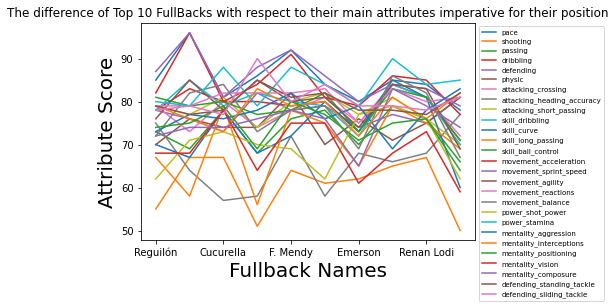

In [7]:
# plot the top 10 fbs with their most associated attributes


df_fb.plot(x = 'short_name', y = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_heading_accuracy', 'attacking_short_passing', 'skill_dribbling', 'skill_curve', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_stamina', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle'])
plt.xlabel('Fullback Names', fontsize = 20)
plt.ylabel('Attribute Score', fontsize = 20)
plt.title("The difference of Top 10 FullBacks with respect to their main attributes imperative for their position")
plt.legend(bbox_to_anchor=(1, 1), fontsize = 7)
plt.show()


In [8]:
# get the fb names in names
names_fb = []
names_fb = pd.DataFrame(fb['short_name'])

fb = fb.drop('short_name', axis = 1)
fb = fb.drop('potential', axis = 1)
names_fb.append(df_fb['short_name'])

fb_norm = (fb - fb.mean())/fb.std()

In [9]:
# use Linear Regression to predict the overall of full-backs
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
fb_x = fb_norm.drop('overall', axis = 1)
fb_w = fb_norm['overall']

lm.fit(fb_x,fb_w)
yhat = lm.predict(fb_x)
print(lm.intercept_)
print(lm.coef_)

-1.1184584809925946e-16
[ 1.79983981e-02  3.23736007e-02  1.76251203e-01  4.34032470e-01
  2.65572251e-01  2.83793260e-02  3.35988165e-02  4.06912064e-02
  8.96466337e-02 -2.58505544e-01 -7.17075542e-03 -6.44069419e-02
 -1.13013371e-02  4.14976767e-02  7.95079093e-02 -6.32390120e-02
  1.74753739e-01 -1.78100772e-02 -8.71605598e-03  8.53297381e-02
 -8.60791529e-05  7.67262955e-03 -2.31633328e-02 -6.29232916e-02
  5.60836360e-02  2.70468857e-02  9.22738649e-02]


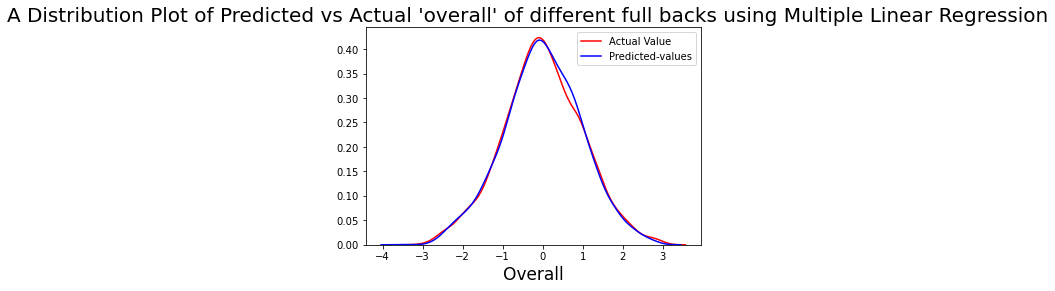

In [10]:
# plot the distribution for actual and predicted values

ax1 = sns.distplot(fb_norm['overall'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(yhat, hist = False, color = 'b', label = 'Predicted-values', ax = ax1)
plt.figtext(.5, .9, "A Distribution Plot of Predicted vs Actual 'overall' of different full backs using Multiple Linear Regression", fontsize = 20, ha = 'center')
plt.xlabel("Overall", fontsize = 17)
plt.show()


In [11]:
# get the actual and predicted table for fullbacks
avp = pd.DataFrame({'Actual' : fb_w, 'Predicted' : yhat})
df.sort_index(inplace=True)

add_names = avp.join(names_fb['short_name'])

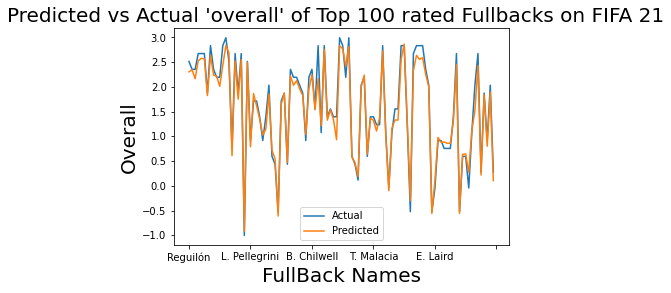

In [12]:
# plot the actual vs predicted of top 100 rated fullbacks according
# to their potential

add_names[0:100].plot(x = 'short_name', y = ['Actual','Predicted'])
plt.figtext(.5, .9, "Predicted vs Actual 'overall' of Top 100 rated Fullbacks on FIFA 21", fontsize = 20, ha = 'center')
plt.xlabel('FullBack Names', fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.show()

In [13]:
# get the error rate for linear regression
from sklearn import metrics
from math import sqrt
print('Mean Squared Error:', sqrt(metrics.mean_squared_error(fb_w, yhat)))
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(fb_w, yhat)))

Mean Squared Error: 0.20184253845107886
Accuracy: 0.7981574615489211


In [14]:
# accuracy for the top 200 fullbacks
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(fb_w[:100], yhat[:100])))

Accuracy: 0.8303744114575213
